In [2]:
from backtesting import evaluateTick
from strategy import Strategy
from order import Order
from event import Event

import matplotlib.pyplot as plt

import numpy as np


In [20]:
class MACDTick(Strategy):
  
  def __init__(self):
    self.flag = 0
    self.short = 1200 #change it (Ticks dont happens on a fixed time)
    self.long = 2600 #change it
    self.emat = 900 #EMA time
    self.signal = 0
    
    self.price_hist = []
    self.mas_hist = []
    self.mal_hist = []
    self.delta_hist = []
    self.signal_hist = []
    

  def push(self, event):
    if event.type == Event.TRADE:
    
      price = event.price
      self.price_hist.append(price)
      orders = []

      if len(self.price_hist) >= self.long:
        
        #set avarages
        lavg = sum(self.price_hist[-self.long:])/self.long
        savg = sum(self.price_hist[-self.short:])/self.short
        
        #set MACD
        delta = savg - lavg
        
        #set EMA (Signal)    ema(t) = price - avg9 * (2 / (9 + 1)) + ema(t-1)
        self.signal = (price - (sum(self.price_hist[-self.emat:]) /self.emat)) * 0.2 + self.signal
        
        #update history
        self.mas_hist.append(savg)
        self.mal_hist.append(lavg)
        self.delta_hist.append(delta)
        self.signal_hist.append(self.signal)
        
        
        #use signal to buy or sell
        #flag is 0 when macd is under signal
        
        if(self.flag):
            #was there a upward crossing?
            if(delta < self.signal):
                self.flag = 0
                orders.append(Order(event.instrument, -100, 0))
                print("s")
        else:
            #was there a downwards crossing?
            if(delta > self.signal):
                self.flag = 1
                orders.append(Order(event.instrument, 100, 0))
                print("b")
        #print(delta , " d " , self.signal)
        #return
        return orders
    
    return []


data = MACDTick()

print(evaluateTick(data, {'PETR4':'2018-03-07.csv'}))

b
s
b
Number of trades: 2
Gross P&L: -29.00
Gross Accumulated return: -0.67%
Gross Average Return: -0.67%
Net P&L: -31.09
Hitting ratio: 0.00%
Max Profit: 6.00
Max Drawdown: -35.00



In [38]:
nh = data.delta_hist.copy()
np = data.price_hist.copy()

factor1 = 100
factor2 = 21.7

for i in range(len(nh)):
    nh[i] *= factor1
    np[i] -= factor2
    np[i] *= factor1


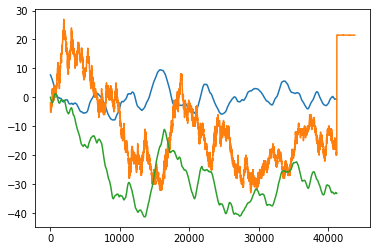

In [39]:
plt.plot(nh)
plt.plot(np)
plt.plot(data.signal_hist)